# Scraping b-ok site (name of books , urls) using selenium , then download all books 
This part is used to download pdfs from b-ok website.
Unfortunately, i could only download only 5 book cause we must have an account on the website.
if we have an account we can download 10 books but i couldn't sign in while scrapping

In [0]:
#Importing packages
!pip install selenium
from selenium import webdriver
import pandas as pd
import os 
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
#from fake_useragent import UserAgent
import pandas as pd
from collections.abc import Iterable
import warnings
# from pymongo import MongoClient
# from collections.abc import Iterable
import time

In [0]:
selenium_driver_path = "C:/Users/SMSM-TECH/Downloads/chromedriver_win32/chromedriver.exe"

In [0]:
# get unique elements from a list
def unique(data):
    return list(dict.fromkeys(data))


# get selenium driver object
def get_selenium_driver():
    """
    This function returns the selenium driver object.

    Parameters:
        None

    Returns:
        driver: selenium driver object
    """

    driver = webdriver.Chrome(executable_path = selenium_driver_path)

    return driver


# get BeautifulSoup object
def get_soup(url):
    """
    Given the url of a page, this function returns the soup object.
    
    Parameters:
        url: the link to get soup object for
    
    Returns:
        soup: soup object
    """
    driver = get_selenium_driver()

    driver.get(url)

    driver.implicitly_wait(3)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    driver.close()

    return soup

#save to MongoDB
def saveToDB(collection, city_areas_zones_dict):
    
    try:
        print("collection.count_documents({}): ",  collection.count_documents({}))
        resultSet = collection.count_documents({"City":city_areas_zones_dict["City"],"Areas_Zones":city_areas_zones_dict['Areas_Zones']})

        if resultSet > 0:
            print("city_areas_zones_dict is already scrapped >> ", city_areas_zones_dict)
            print("Skip!")
        else:
            print("New city_areas_zones_dict will be scrapped >> ", city_areas_zones_dict)
            print("I will insert it!")
            collection.insert_one(city_areas_zones_dict)
            
    except Exception as e:
        print('Exception : %s' % str(e))

In [0]:
import re

# scrape b-ok website

def scrape_books():
    books_names = []

    for num in range(1,2):
        base_url = "https://b-ok.cc/s/natural%20language%20processing?page="+str(num)

        home_page_soup = get_soup(base_url)

        # get a get_selenium_driver object
        driver = get_selenium_driver()
        #driver.execute_script("return navigator.userAgent")
        driver.get(base_url)
        

        home_page_soup=home_page_soup.find_all("div",{'id':"searchResultBox"})
        links=home_page_soup[0].find_all("a",{"href":re.compile("^/book/")})
        #print(links)
            

        all_link = []
        for link in links:
            part_of_link = link.get("href")
            link = "https://b-ok.cc"+part_of_link
            all_link.append(link)
            all_link = list(set(all_link))
            print("all_link")
            print(len(all_link))

            print(all_link)
        
        for link in all_link:
            page_driver2 = get_selenium_driver()
            page_driver2.get(link)
            page_driver2.find_element_by_class_name("dlButton").click()
            


        
        time.sleep(3)
        print("----------------------------------")
    driver.close()
        


In [0]:
scrape_books()

all_link
1
['https://b-ok.cc/book/3681492/07d64c']
all_link
1
['https://b-ok.cc/book/3681492/07d64c']
all_link
2
['https://b-ok.cc/book/3642068/da7d8c', 'https://b-ok.cc/book/3681492/07d64c']
all_link
2
['https://b-ok.cc/book/3642068/da7d8c', 'https://b-ok.cc/book/3681492/07d64c']
all_link
3
['https://b-ok.cc/book/3711505/debacd', 'https://b-ok.cc/book/3642068/da7d8c', 'https://b-ok.cc/book/3681492/07d64c']
all_link
3
['https://b-ok.cc/book/3711505/debacd', 'https://b-ok.cc/book/3642068/da7d8c', 'https://b-ok.cc/book/3681492/07d64c']
all_link
4
['https://b-ok.cc/book/3711505/debacd', 'https://b-ok.cc/book/3642068/da7d8c', 'https://b-ok.cc/book/4984922/b162b3', 'https://b-ok.cc/book/3681492/07d64c']
all_link
4
['https://b-ok.cc/book/3711505/debacd', 'https://b-ok.cc/book/3642068/da7d8c', 'https://b-ok.cc/book/4984922/b162b3', 'https://b-ok.cc/book/3681492/07d64c']
all_link
5
['https://b-ok.cc/book/755716/be52d7', 'https://b-ok.cc/book/4984922/b162b3', 'https://b-ok.cc/book/3711505/debac

ElementClickInterceptedException: Message: element click intercepted: Element <a href="#" id="dbx_3362289" class="btn btn-primary dlButton disabled" data-toggle="tooltip" data-autoopen="true" data-placement="top" title="" data-original-title="Link deleted by legal owner (But you can use <a href=&quot;/msgn/tor&quot; target=&quot;_blank&quot; rel=&quot;nofollow&quot;>TOR</a> to download it anyway)" aria-describedby="tooltip105214">...</a> is not clickable at point (142, 604). Other element would receive the click: <div class="book-details-button">...</div>
  (Session info: chrome=80.0.3987.149)


# PDF Page Summarization Steps
1. Reading the Page content then printing it.
2. Cleaning the Page content then printing it.
3. Splitting into sentences (Tokenization) but the last sentence is removed and also the sentences which smaller than 5 words then printing all the chosen sentences.
4. Vectorizing each sentence using TF-Hub Universal sentence Encoder (embedding matrix).
5. Applyig Elbow method to specify the no. of clusters which represent the no. of sentences in the summary ( I choosed the no. after which the wcss dropped below 4)
6. Applaying Kmeans clusturing to cluster the sentences into the specified no of clusters.
7. Forming Page summary from the sentences which are the nearst to clusteres centroids. from each cluster we take a sentence; this sentence is the closest to the centroid. Then we join these sentences together to form the summary.
8. Printing the summary of The Page.

###### note: this notebook needs to be ran on colab as it uses the GPU version of tensorflow or you need to :
  1. Install the latest Tensorflow version.
     - !pip3 install --upgrade tensorflow-gpu
  2. Install TF-Hub by
     - !pip3 install tensorflow-hub 
     - !pip3 install seaborn

In [2]:
#installing pdfminer
!pip install PyPDF2

In [3]:
# Importing the required libraries
import PyPDF2
from PyPDF2 import PdfFileReader
import os
import tensorflow_hub as hub
import nltk
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## PDF file and PDF reader objects

In [0]:
# Creating a pdf file object
pdf = open("drive/My Drive/Colab/task6/task7/Applied Text Analysis with Python Enabling Language-Aware Data Products with Machine Learning by Benjamin Bengfort, Tony Ojeda, Rebecca Bilbro (z-lib.org).pdf","rb")
# required variables
ENCRYPTED_FILE_PATH = "Doc1 password.pdf"
FILE_OUT_PATH = "Doc2 password.pdf"
#creating pdf reader object
pdf_reader = PdfFileReader(pdf) 

if pdf_reader.isEncrypted:
    try:
        pdf_reader.decrypt('123456')
    except NotImplementedError:
        command=f"qpdf --password='{123456}' --decrypt {ENCRYPTED_FILE_PATH} {FILE_OUT_PATH};"
        os.system(command)            
        with open("Doc1 password.pdf", mode='rb') as fp:
            pdf_reader = PyPDF2.PdfFileReader(fp)
            print(f"Number of page: {pdf_reader.getNumPages()}")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Calculating number of pages

In [6]:
#checking number of pages in a pdf file
no_of_pages = pdf_reader.numPages
print("Num of pages in the PDF: ", no_of_pages,"\n")
            

Num of pages in the PDF:  332 



## Loading TF unversal sentence embedding pretrained model & defining the embedding function

In [7]:
   
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  vectors = model(input)
  # from tensors to list of vectors (embedding matrix)
  vectors = np.array(vectors).tolist()
  return vectors

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


## One page Summarization


### Defining a function to clean a page

In [0]:
def Clean_Page(pageText):
  # replacing multiple spaces by single space
  pageText = re.sub('[\s]+', ' ', pageText)
  # replacing multiple newlines by space
  pageText = re.sub('[\n]+', ' ', pageText)
  # replacing e.g. by for example 
  pageText = pageText.replace("e.g.","for example")
  # replacing certain symbols by space
  pageText = re.sub("\n|—|-"," ", pageText)
  # removing urls
  pageText = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',pageText)
  # removing the rest of punctuations
  pageText = re.sub("[^a-zA-Z0-9\.\s+,]","", pageText)
  # replacing multiple spaces by single space
  pageText = re.sub('[\s]+', ' ', pageText)
  return pageText

 ### Defining a function to use the elbow method to find the optimal number of clusters (sentences in summary)

In [0]:
def Plot_elbow(sen_vectors):
   wcss = []
   for i in range(1, len(sen_vectors)):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(sen_vectors)
      wcss.append(kmeans.inertia_)
   plt.plot(range(1, len(sen_vectors)), wcss)
   plt.title('The Elbow Method')
   plt.xlabel('Number of clusters')
   plt.ylabel('WCSS')
   plt.show() 
   clusters = int(input("Please enter the required no. of clusters (from 1 to %d): " %len(sen_vectors)))
   return clusters


### Defining a function to plit the text into a list of sentences (tokenization)


In [0]:
# splitting the text into a list of sentences (tokenization)
def Sentence_split(pageText): 
  sent = pageText.split(".")####
  sentences=[]
  for i in range(len(sent)):
    if ((len(sent[i].strip().split(" "))> 4) & (i != (len(sent)-1))):###
     sentences.append(sent[i].strip())
  return sentences

### Defining a function to summerize a page

In [0]:
def Summarize_Page(pdf_reader, pageNum, n_clusters):
  # creating a page object
  page = pdf_reader.getPage(pageNum)
  # extracting text from the page
  pageText = page.extractText()
  # cleaning the page text
  pageText = Clean_Page(pageText)
  sentences = Sentence_split(pageText)
  # embedding all the sentences in the list (vectorization)
  sen_vectors= embed(sentences)
  # clustering using kmeans 
  #n_clusters = int(np.ceil(len(sentences)**0.5))
  kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', random_state = 42)
  kmeans = kmeans.fit(sen_vectors)
  # obtaining the indices of the nearst sentences to clusters centroids
  closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, sen_vectors)
  # sorting the indices
  closest.sort()
  # joining the sentences (closest to centroids) to obtain the summary
  summary=[]
  for i in closest:
      summary.append(sentences[i])
  summary='. '.join(summary) + "."
  return summary

### Summarize page no. 75 (Index 74)

#### Asking the user to enter the page number

In [12]:
flag = True
while flag:
 pageNumber = int(input("Please enter the page number (from 0 to %d): " %(no_of_pages-1)))
 if pageNumber > (no_of_pages-1):
   print("\nInvalid page numer\n")
   pageNumber = int(input("Please enter the page number (from 0 to %d): " %(no_of_pages-1)))
 else:
   flag= False

Please enter the page number (from 0 to 331): 74


#### Printing the Page Content

In [13]:
# creating a page object
page = pdf_reader.getPage(pageNumber)
# extracting text from the page
pageText = page.extractText()
# printing the content of the page
print("Page Content:\n")
print(pageText)

Page Content:

CHAPTER 4Text Vectorization and TransformationPipelinesMachine learning algorithms operate on a numeric feature space, expecting input as a
two-dimensional array where rows are instances and columns are features. In order
to perform machine learning on text, we need to transform our documents into vec‡
tor representations such that we can apply numeric machine learning. This process is
called feature extraction
 or more simply, 
vectorization
, and is an essential first step
toward language-aware analysis.
Representing documents numerically gives us the ability to perform meaningful ana‡
lytics and also creates the 
instances
 on which machine learning algorithms operate. 
Intext analysis, instances are entire documents or utterances, which can vary in length
from quotes or tweets to entire books, but whose vectors are always of a uniform
length. Each property of the vector representation is a 
feature
. For text, features repre‡
sent attributes and properties of documen

#### Printing Page Content After Cleaning and The splitted sentences





In [14]:
 # cleaning the page text
pageText_cleaned = Clean_Page(pageText)
print("Page Content After Cleaning:\n")
print(pageText_cleaned,"\n\n")

sentences_splitted = Sentence_split(pageText_cleaned)
print("The splitted sentences:\n")
for i in range(len(sentences_splitted)):
    print(sentences_splitted[i]+".\n")

Page Content After Cleaning:

CHAPTER 4Text Vectorization and TransformationPipelinesMachine learning algorithms operate on a numeric feature space, expecting input as a two dimensional array where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our documents into vec tor representations such that we can apply numeric machine learning. This process is called feature extraction or more simply, vectorization , and is an essential first step toward language aware analysis. Representing documents numerically gives us the ability to perform meaningful ana lytics and also creates the instances on which machine learning algorithms operate. Intext analysis, instances are entire documents or utterances, which can vary in length from quotes or tweets to entire books, but whose vectors are always of a uniform length. Each property of the vector representation is a feature . For text, features repre sent attributes and properties of d

#### Summerization and Choosing no. of sentences in summary based on elbow method

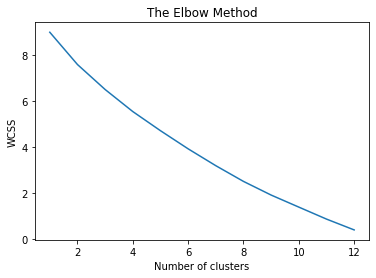

Please enter the required no. of clusters (from 1 to 13): 6


In [15]:
# embedding all the sentences in the list (vectorization)
sen_vectors= embed(sentences_splitted)
# choosing the number of clusters using elbow method
no_sentences = Plot_elbow(sen_vectors)

In [0]:
# summarization
summary = Summarize_Page(pdf_reader, pageNumber, no_sentences)

#### Printing Page Summary

In [17]:
# printing the summary of the page
print("Page Summary:\n")
print(summary)

Page Summary:

This process is called feature extraction or more simply, vectorization , and is an essential first step toward language aware analysis. Representing documents numerically gives us the ability to perform meaningful ana lytics and also creates the instances on which machine learning algorithms operate. Intext analysis, instances are entire documents or utterances, which can vary in length from quotes or tweets to entire books, but whose vectors are always of a uniform length. For text, features repre sent attributes and properties of documents including its content as well as meta attributes, such as document length, author, source, and publication date. Points in space can be close together or far apart, tightly clustered or evenly dis tributed. The simplest encoding of semantic space is the bag of words model, whose primary insight is that meaning and similarity are encoded in vocabulary.


### Summarize page no. 29 (Index 28)

#### Asking the user to enter the page number

In [18]:
flag = True
while flag:
 pageNumber = int(input("Please enter the page number (from 0 to %d): " %(no_of_pages-1)))
 if pageNumber > (no_of_pages-1):
   print("\nInvalid page numer\n")
   pageNumber = int(input("Please enter the page number (from 0 to %d): " %(no_of_pages-1)))
 else:
   flag= False

Please enter the page number (from 0 to 331): 28


#### Printing the Page Content

In [19]:
# creating a page object
page = pdf_reader.getPage(pageNumber)
# extracting text from the page
pageText = page.extractText()
# printing the content of the page
print("Page Content:\n")
print(pageText)

Page Content:

type of language model is hugely influential to text analytics because it demonstrates
the basic mechanism of a language application—the use of context to guess meaning.
Language models also reveal the basic hypothesis behind applied machine learning
on text: text is predictable
. In fact, the mechanism used to score language models inan academic context, 
perplexity
, is a measure of how predictable the text is by evaluat‡
ing the entropy
 (the level of uncertainty or surprisal) of the language model†s proba‡
bility distribution.Consider the following partial phrases: –man†s best‹ƒ or –the witch flew on a‹ƒ.
These low entropy phrases mean that language models would guess –friendƒ and
–broomstick,ƒ respectively, with a high likelihood (and in fact, English speakers would
be surprised if the phrase wasn†t completed that way). On the other hand, high
entropy phrases like –I†m going out to dinner tonight with my‹ƒ lend themselves to a
lot of possibilities (–friend,ƒ –mother

#### Printing Page Content After Cleaning and The splitted sentences





In [20]:
 # cleaning the page text
pageText_cleaned = Clean_Page(pageText)
print("Page Content After Cleaning:\n")
print(pageText_cleaned,"\n\n")

sentences_splitted = Sentence_split(pageText_cleaned)
print("The splitted sentences:\n")
for i in range(len(sentences_splitted)):
    print(sentences_splitted[i]+".\n")

Page Content After Cleaning:

type of language model is hugely influential to text analytics because it demonstrates the basic mechanism of a language application the use of context to guess meaning. Language models also reveal the basic hypothesis behind applied machine learning on text text is predictable . In fact, the mechanism used to score language models inan academic context, perplexity , is a measure of how predictable the text is by evaluat ing the entropy the level of uncertainty or surprisal of the language models proba bility distribution.Consider the following partial phrases mans best or the witch flew on a. These low entropy phrases mean that language models would guess friend and broomstick, respectively, with a high likelihood and in fact, English speakers would be surprised if the phrase wasnt completed that way. On the other hand, high entropy phrases like Im going out to dinner tonight with my lend themselves to a lot of possibilities friend, mother, and work colle

#### Summerization and Choosing no. of sentences in summary based on elbow method

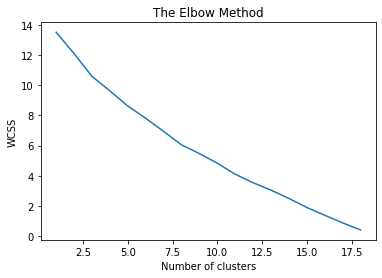

Please enter the required no. of clusters (from 1 to 19): 10


In [21]:
# embedding all the sentences in the list (vectorization)
sen_vectors= embed(sentences_splitted)
# choosing the number of clusters using elbow method
no_sentences = Plot_elbow(sen_vectors)

In [0]:
# summarization
summary = Summarize_Page(pdf_reader, pageNumber, no_sentences)

#### Printing Page Summary

In [23]:
# printing the summary of the page
print("Page Summary:\n")
print(summary)

Page Summary:

Language models also reveal the basic hypothesis behind applied machine learning on text text is predictable. Consider the following partial phrases mans best or the witch flew on a. These low entropy phrases mean that language models would guess friend and broomstick, respectively, with a high likelihood and in fact, English speakers would be surprised if the phrase wasnt completed that way. On the other hand, high entropy phrases like Im going out to dinner tonight with my lend themselves to a lot of possibilities friend, mother, and work colleagues could all be equally likely. Human listeners can use experience, imagination, and memory as well as sit uational context to fill in the blank. Computational models do not necessarily have the same context and as a result must be more constrained. In the formal definition, the model is taking advantage of context, defining a narrow decision space in which only a few possibilities exist. Text data provides many opportunities 

### Summarize page no. 270 (Index 269)

#### Asking the user to enter the page number

In [24]:
flag = True
while flag:
 pageNumber = int(input("Please enter the page number (from 0 to %d): " %(no_of_pages-1)))
 if pageNumber > (no_of_pages-1):
   print("\nInvalid page numer\n")
   pageNumber = int(input("Please enter the page number (from 0 to %d): " %(no_of_pages-1)))
 else:
   flag= False

Please enter the page number (from 0 to 331): 269


#### Printing the Page Content

In [25]:
# creating a page object
page = pdf_reader.getPage(pageNumber)
# extracting text from the page
pageText = page.extractText()
# printing the content of the page
print("Page Content:\n")
print(pageText)

Page Content:

simpler abstractions in the form of 
Pools and Queues, which we†ll explore in this
section.A common combination of both data and task parallelism is to
have two data parallel tasks; the first 
maps
 an operation to many
data inputs and the second 
reduces
 the map operation to a set of
aggregations. This style of parallel computing has been made very
popular by Hadoop and Spark, which we will discuss in the next
section.Larger workflows can be described as a directed acyclic graph (DAG), where a series
of parallel steps is executed with synchronization points in between. A synchroniza‡
tion point ensures that all parts of the processing have completed or caught up before
execution continues. Data is also generally exchanged at synchronization points, sent
out to parallel tasks from the main task, or retrieved by the main task.Data parallel execution is still appropriate for the Python multiprocessing library,
however, some additional considerations are required. The firs

#### Printing Page Content After Cleaning and The splitted sentences





In [26]:
 # cleaning the page text
pageText_cleaned = Clean_Page(pageText)
print("Page Content After Cleaning:\n")
print(pageText_cleaned,"\n\n")

sentences_splitted = Sentence_split(pageText_cleaned)
print("The splitted sentences:\n")
for i in range(len(sentences_splitted)):
    print(sentences_splitted[i]+".\n")

Page Content After Cleaning:

simpler abstractions in the form of Pools and Queues, which well explore in this section.A common combination of both data and task parallelism is to have two data parallel tasks the first maps an operation to many data inputs and the second reduces the map operation to a set of aggregations. This style of parallel computing has been made very popular by Hadoop and Spark, which we will discuss in the next section.Larger workflows can be described as a directed acyclic graph DAG, where a series of parallel steps is executed with synchronization points in between. A synchroniza tion point ensures that all parts of the processing have completed or caught up before execution continues. Data is also generally exchanged at synchronization points, sent out to parallel tasks from the main task, or retrieved by the main task.Data parallel execution is still appropriate for the Python multiprocessing library, however, some additional considerations are required. The

#### Summerization and Choosing no. of sentences in summary based on elbow method

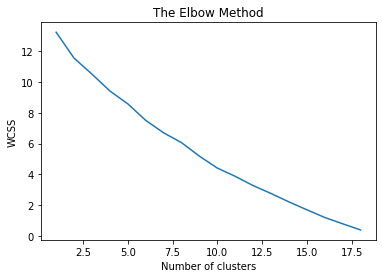

Please enter the required no. of clusters (from 1 to 19): 10


In [27]:
# embedding all the sentences in the list (vectorization)
sen_vectors= embed(sentences_splitted)
# choosing the number of clusters using elbow method
no_sentences = Plot_elbow(sen_vectors)

In [0]:
# summarization
summary = Summarize_Page(pdf_reader, pageNumber, no_sentences)

#### Printing Page Summary

In [29]:
# printing the summary of the page
print("Page Summary:\n")
print(summary)

Page Summary:

simpler abstractions in the form of Pools and Queues, which well explore in this section. This style of parallel computing has been made very popular by Hadoop and Spark, which we will discuss in the next section. A synchroniza tion point ensures that all parts of the processing have completed or caught up before execution continues. Data is also generally exchanged at synchronization points, sent out to parallel tasks from the main task, or retrieved by the main task. Data parallel execution is still appropriate for the Python multiprocessing library, however, some additional considerations are required. The first is how many pro cesses to use and how. This leads to the second consideration How do you safely send and receive data from a process, ensuring no duplication or corruption For this, you need to use a multiprocessing. A process can safely putitem an item onthe queue and another process can safely get an item from the queue in a first in,first out FIFO fashion. 

### Summarize page no. 305 (Index 304)

#### Asking the user to enter the page number

In [30]:
flag = True
while flag:
 pageNumber = int(input("Please enter the page number (from 0 to %d): " %(no_of_pages-1)))
 if pageNumber > (no_of_pages-1):
   print("\nInvalid page numer\n")
   pageNumber = int(input("Please enter the page number (from 0 to %d): " %(no_of_pages-1)))
 else:
   flag= False

Please enter the page number (from 0 to 331): 304


#### Printing the Page Content

In [31]:
# creating a page object
page = pdf_reader.getPage(pageNumber)
# extracting text from the page
pageText = page.extractText()
# printing the content of the page
print("Page Content:\n")
print(pageText)

Page Content:

positively and negatively associated modifiers and nonlexical factors like sarcasm,
hyperbole, and symbolism.
In Chapter 1
 we briefly introduced sentiment analysis to describe the importance of
contextual features. Whereas a language feature like gender is often encoded in the
structure of language, sentiment is often much too complex to be encoded at the
token level. Take, for example, this sample text from a set of Amazon customer
reviews of patio, lawn, and garden equipment:
I used to use a really primitive manual edger that I inherited from my father. Blistered
hands and time wasted, I decided there had to be a better way and this is surely it. Edg‡
ing is one of those necessary evils if you want a great looking house. I don†t edge every
time I mow. Usually I do it every other time. The first time out after a long winter, edg‡
ing usually takes a little longer. After that, edging is a snap because you are basically in
maintenance mode. I also use this around my land

#### Printing Page Content After Cleaning and The splitted sentences





In [32]:
 # cleaning the page text
pageText_cleaned = Clean_Page(pageText)
print("Page Content After Cleaning:\n")
print(pageText_cleaned,"\n\n")

sentences_splitted = Sentence_split(pageText_cleaned)
print("The splitted sentences:\n")
for i in range(len(sentences_splitted)):
    print(sentences_splitted[i]+".\n")

Page Content After Cleaning:

positively and negatively associated modifiers and nonlexical factors like sarcasm, hyperbole, and symbolism. In Chapter 1 we briefly introduced sentiment analysis to describe the importance of contextual features. Whereas a language feature like gender is often encoded in the structure of language, sentiment is often much too complex to be encoded at the token level. Take, for example, this sample text from a set of Amazon customer reviews of patio, lawn, and garden equipment I used to use a really primitive manual edger that I inherited from my father. Blistered hands and time wasted, I decided there had to be a better way and this is surely it. Edg ing is one of those necessary evils if you want a great looking house. I dont edge every time I mow. Usually I do it every other time. The first time out after a long winter, edg ing usually takes a little longer. After that, edging is a snap because you are basically in maintenance mode. I also use this arou

#### Summerization and Choosing no. of sentences in summary based on elbow method

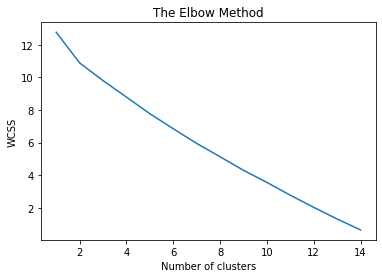

Please enter the required no. of clusters (from 1 to 15): 8


In [33]:
# embedding all the sentences in the list (vectorization)
sen_vectors= embed(sentences_splitted)
# choosing the number of clusters using elbow method
no_sentences = Plot_elbow(sen_vectors)

In [0]:
# summarization
summary = Summarize_Page(pdf_reader, pageNumber, no_sentences)

#### Printing Page Summary

In [35]:
# printing the summary of the page
print("Page Summary:\n")
print(summary)

Page Summary:

Whereas a language feature like gender is often encoded in the structure of language, sentiment is often much too complex to be encoded at the token level. Take, for example, this sample text from a set of Amazon customer reviews of patio, lawn, and garden equipment I used to use a really primitive manual edger that I inherited from my father. Blistered hands and time wasted, I decided there had to be a better way and this is surely it. Edg ing is one of those necessary evils if you want a great looking house. I dont edge every time I mow. After that, edging is a snap because you are basically in maintenance mode. The blade on the Edge Hog is easily replaceable and the tell tale sign to replace it is when the edge starts to look a little rough and the machine seemsslower. Amazon reviewerIf we predict the rating using a count of the positive and negative review words as with the gendered words in Chapter 1 , what score would you expect to see In spite of many of the negat

## Closing the pdf file

In [0]:
pdf.close()

## Notes
##### We can change the following:
1. the number of clusters.
2. the minimum no. of words in the sentence to be included in the list to perform clustering.
3. the method of vectorization (here i choose TF universal sentence encoder as it gives good features but it can be any way of sentence embedding).
##### Also, there are some mistakes due to the library pypdf2 which can not exclud the footer or heading and also the outlines words are connected as in the first sentence in page 75"CHAPTER 4Text Vectorization and TransformationPipelinesMachine" and also the outline and the first sentence in the page; that's why I removed the last sentence as it always contains the footer of the page.
##### Also I avoided the pages that contain codes and images to be summerized.